# What are the main determinants of health insurance costs?

Importing and cleaning the data

In [33]:
# import modules
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import random
import warnings
warnings.filterwarnings("ignore")

In [34]:
# import csv into pandas file
insurance_csv = Path('insurance.csv')
insurance_df = pd.read_csv(insurance_csv)
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


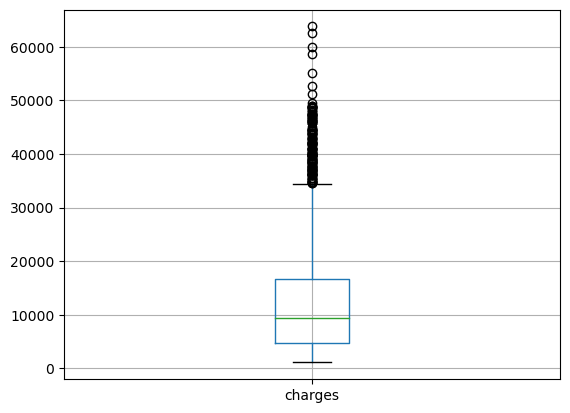

In [35]:
# boxplot of values and outliers
insurance_df.boxplot(column="charges")
plt.show()

In [36]:
# find and remove outliers
quartiles= insurance_df["charges"].quantile([.25,.5,.75])
lowerq= quartiles[.25]
upperq= quartiles[.75]
iqr= upperq-lowerq
lower_bound = lowerq-(1.5*iqr)
upper_bound=upperq+(1.5*iqr)
insurance_df= insurance_df.loc[(insurance_df["charges"]>=lower_bound) |\
                                     (insurance_df["charges"]<upper_bound)]

In [37]:
# drop NAs 
insurance_df.isnull().values.any()
insurance_df.dropna()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Descriptive Statistics

In [38]:
# print descriptive statistics 
print(insurance_df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


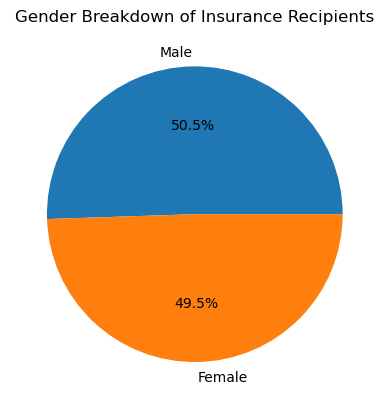

In [39]:
# pie charts of gender percentage 
categories=["Male","Female"]
gender_count=insurance_df["sex"].value_counts()
# gender_count
plt.pie(gender_count, labels=categories, autopct='%1.1f%%')
plt.title("Gender Breakdown of Insurance Recipients")
plt.show()

In [40]:
#groupby gender
gender_groupby = insurance_df.groupby("sex").mean()
gender_groupby


,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


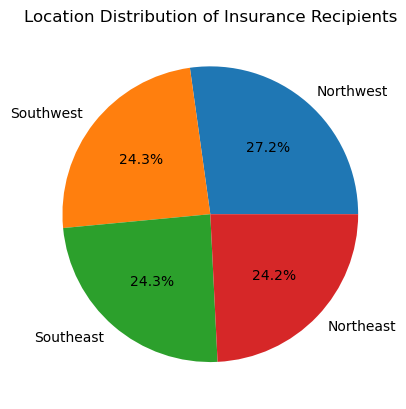

In [41]:
# region percentage bar chart 
categories=["Northwest","Southwest","Southeast","Northeast"]
region_count= insurance_df["region"].value_counts()
#region_count
plt.pie(region_count, labels=categories, autopct='%1.1f%%')
plt.title("Location Distribution of Insurance Recipients")
plt.show()

In [42]:
#groupby region
region_groupby = insurance_df.groupby("region").mean()
region_groupby


,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


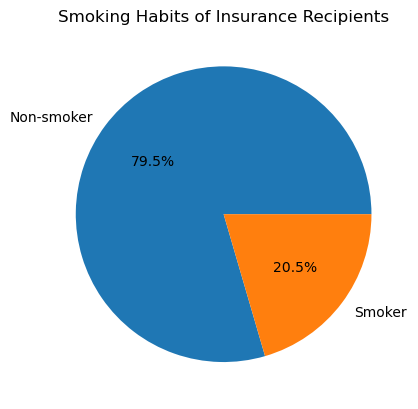

In [43]:
# percentage of smokers 
categories=["Non-smoker","Smoker"]
smoker_count=insurance_df["smoker"].value_counts()
plt.pie(smoker_count, labels=categories, autopct='%1.1f%%')
plt.title("Smoking Habits of Insurance Recipients")
plt.show()

In [44]:
#groupby smokers
smoker_groupby = insurance_df.groupby("smoker").mean()
smoker_groupby

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


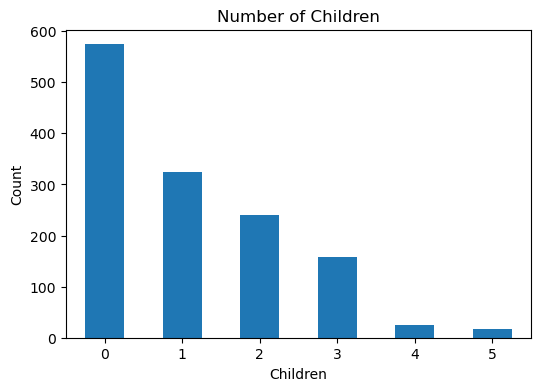

In [45]:
# number of children bar chart 
children_count=insurance_df["children"].value_counts().plot(kind="bar", figsize=(6,4), rot=0)
plt.title("Number of Children")
plt.xlabel("Children")
plt.ylabel("Count")
plt.show()

In [46]:
#children groupby
children_groupby = insurance_df.groupby("children").mean()
children_groupby

,age,bmi,charges
children,,,
0,38.444251,30.550296,12365.975602
1,39.453704,30.623148,12731.171832
2,39.445833,30.978104,15073.563734
3,41.566879,30.684331,15355.318367
4,39.000000,31.391200,13850.656311
5,35.611111,29.605000,8786.035247


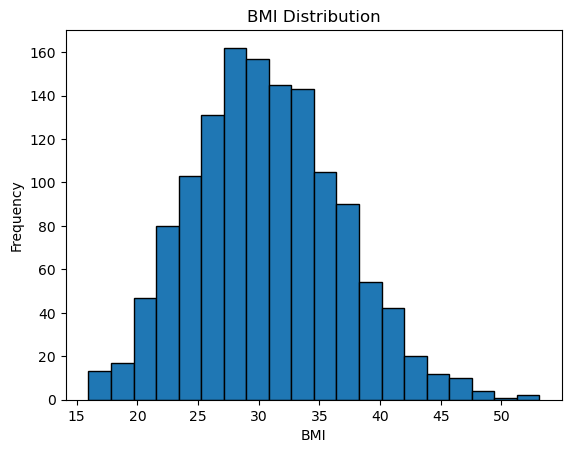

In [47]:
# bmi histogram 
plt.hist(insurance_df["bmi"], bins=20, edgecolor='black')
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("BMI Distribution")
plt.show()

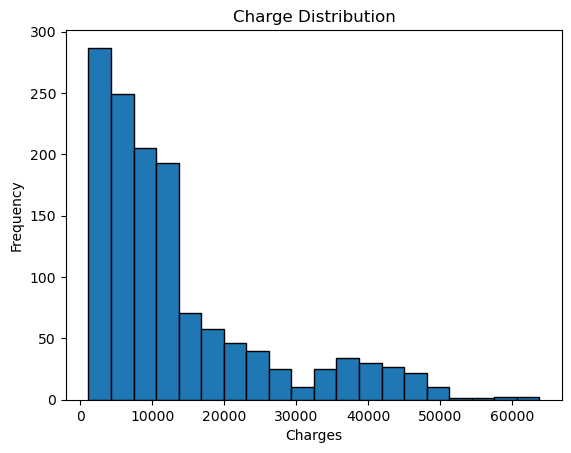

In [48]:
# insurance cost histogram
plt.hist(insurance_df["charges"], bins=20, edgecolor='black')
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Charge Distribution")
plt.show()

Relationships between independent variables

In [ ]:
# print correlations --> don't do scatterplots 

Relationships between independent variables and health insurance costs

In [ ]:
# graph 1: bmi vs. insurance costs (scatterplot)


In [ ]:
# graph 2: age vs. insurance costs (scatterplot)

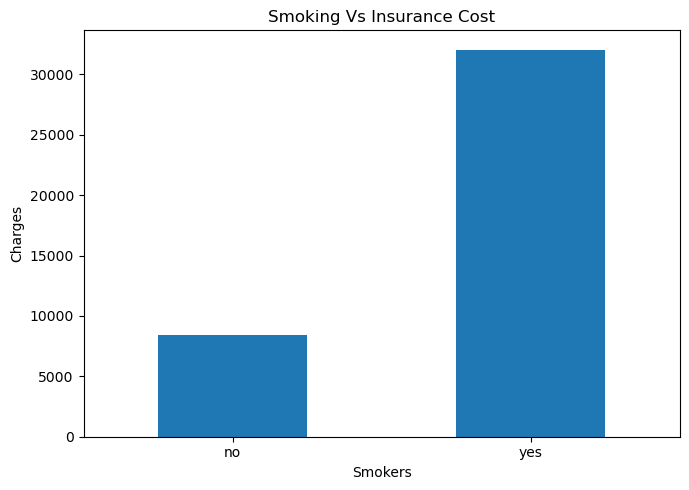

In [49]:
# graph 3: smoking vs. insurance costs (bar graph)
smoker_cost = smoker_groupby["charges"]
smoker_cost.plot(kind="bar", figsize=(7,5), rot=0)

plt.xlabel("Smokers")
plt.ylabel("Charges")
plt.title("Smoking Vs Insurance Cost")
plt.tight_layout()
plt.show()

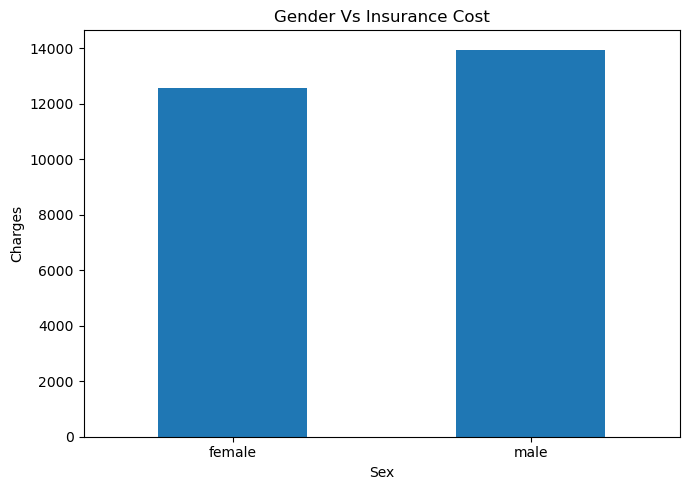

In [50]:
# graph 4: gender vs. insurance costs (bar graph)

gender_cost = gender_groupby["charges"]
gender_cost.plot(kind="bar", figsize=(7,5), rot=0)

plt.xlabel("Sex")
plt.ylabel("Charges")
plt.title("Gender Vs Insurance Cost")
plt.tight_layout()
plt.show()

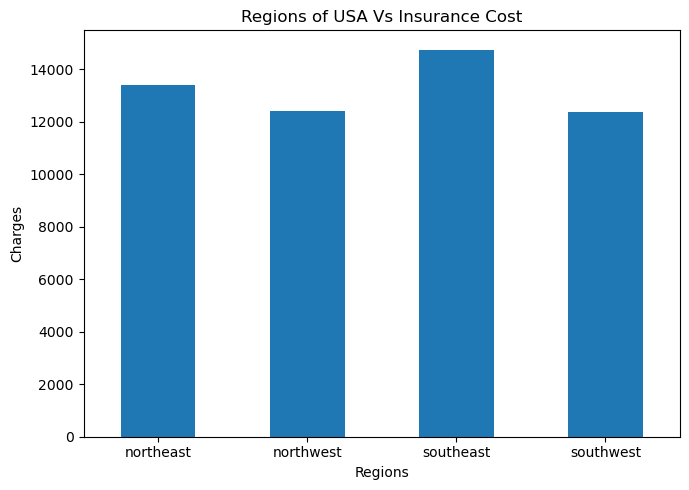

In [51]:
# graph 5: region of the country (bar graph)
region_cost = region_groupby["charges"]
region_cost.plot(kind="bar", figsize=(7,5), rot=0)

plt.xlabel("Regions")
plt.ylabel("Charges")
plt.title("Regions of USA Vs Insurance Cost")
plt.tight_layout()
plt.show()

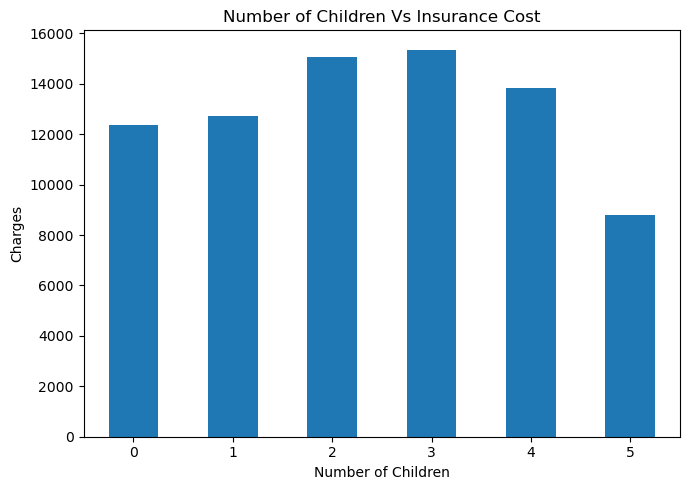

In [52]:
# graph 6: # of children vs. insurance costs (bar graph)
children_cost = children_groupby["charges"]
children_cost.plot(kind="bar", figsize=(7,5), rot=0)

plt.xlabel("Number of Children")
plt.ylabel("Charges")
plt.title("Number of Children Vs Insurance Cost")
plt.tight_layout()
plt.show()

In [ ]:
# regression 
# insurance costs = a0 + a1*bmi + a2*age + a3*dummy1 + 